# Modelling the TISE
By Kai Stewart, Felix Yu, Paul Lutkus, Jessie Yang

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

We begin with the usual expression for the TISE:
$-\frac{\hbar^2}{2m}\frac{d^2\Psi}{dx^2} + V(x)\Psi = E\Psi $

We then isolate the second derivative term:
$\frac{d^2\Psi}{dx^2} = \frac{2m}{\hbar^2}(V(x)-E)\Psi $

We wish to redefine the equation is such a way that it is unitless, for easier numerical integration.
Thus, we define the following:

In [3]:
## We are arbitrarily choosing an x range of interest
## We can imagine that the units are of any magnitude and therefore it doesn't matter
##   since we are only interested in the shape
x0 = 0; xf = 10; dx = 0.01
nsteps = int((xf-x0)/dx)

E0 = 0; Ef = 15; dE = (Ef-E0)/nsteps   # Energy range depends on our x range - these look the prettiest on this x range
                  # Higher energies don't get a chance to flatten out in this x range

## These numbers determine the scale of the graph, but we're only interested in the shape
## Therefore, setting them to 1 makes it easier to get the gist of the wavefunctions
m = hbar = 1
a = 1  # arbitrary distance, see next cell

In [4]:
# Create arrays that we can later iterate over
x = np.linspace(x0,xf,nsteps)
E = np.linspace(E0, Ef, nsteps)
Z = np.zeros([nsteps])  # Z = x/a where a is an arbitrary distance - allows Z to be unitless
U = np.zeros([nsteps])  # = V(x)/E0 where E0 = hbar^2/(2ma^2) - allows potential to be unitless
for i in range(nsteps):
    Z[i] = x[i] / a
    U[i] = x[i] * (2*m*a**2) / (hbar**2)
    
psi= np.zeros([nsteps])
Dpsi = np.zeros([nsteps])
D2psi = np.zeros([nsteps])
fE = np.zeros([nsteps])    # An array to store the end value of psi for a given E

psi[0] = 0
Dpsi[0] = 1
D2psi[0] = 0

# Finds and stores the endpoints of psi at different energies
for i in range(nsteps):
    for j in range (1, nsteps):
        D2psi[j] = (U[j] - E[i])*psi[j-1]
        Dpsi[j] = Dpsi[j-1] + D2psi[j-1]*dx
        psi[j] = psi[j-1] + Dpsi[j-1]*dx
    fE[i] = psi[nsteps-1]

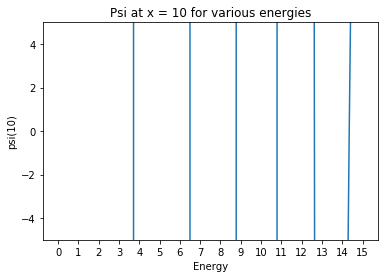

In [5]:
plt.plot(E,fE)
plt.ylim(-5, 5)
xticks = np.arange(16)
plt.xticks(xticks)
plt.title('Psi at x = 10 for various energies')
plt.xlabel('Energy')
plt.ylabel('psi(10)')
plt.show()

In the above graph, we can see where the expected roots are. Visually, we can estimate that the roots are around 3.7, 6.4, 8.7, 10.8, 12.6, and 14.3. 

These roots correspond to the energies at which $\Psi(10) = 0$. From playing with the plots of $\Psi$ at different energies, we know that at low energies (specifically up to about E = 15), $\Psi(10) = 0$ only if the wavefunction has flattened out. This is consistent with what is considered to be a well-behaved wavefunction and is therefore a sign that we have found an energy eigenvalue 

In [6]:
## A function that takes an energy and returns psi at x=10 for that energy
## Required for the brentq root finder
def findEndpoint(E):
    psi = np.zeros([nsteps])
    Dpsi = np.zeros([nsteps])
    D2psi = np.zeros([nsteps])
    fE = np.zeros([nsteps])

    psi[0] = 0
    Dpsi[0] = 1
    D2psi[0] = 0
    
    for j in range (1, nsteps):
        D2psi[j] = (U[j] - E)*psi[j-1]
        Dpsi[j] = Dpsi[j-1] + D2psi[j-1]*dx
        psi[j] = psi[j-1] + Dpsi[j-1]*dx
        
    return psi[nsteps-1]

In [7]:
Psi_E = []   # Define an array of eigenvalues

for i in range(Ef):
    try:
        root = brentq(findEndpoint, i, i+1)
        Psi_E.append(root)
    except:
        continue
        
print(Psi_E)

[3.7147911964384774, 6.495996633418627, 8.773662715930088, 10.78717711562243, 12.62820525347683, 14.344105734579898]


The above roots are definitely in the range of what we estimated. We can graph $\Psi(x)$ at these energies to visually confirm that they are well behaved wave functions. But first, let's see another way to find a root

In [8]:
## A homemade root finder that looks for a sign change and assumes root is in the middle
## Args: An array of f(x) values, step size of x used when calculating f(x)
## Return: An array of roots where f(x) = 0

def findRoots(numArray, dx):
    # Find the roots given an array of numbers, return an array of the roots
    roots = []
    if numArray[0] >= 0:
        was_positive = True
    else:
        was_positive = False
    for i, n in enumerate(numArray):
        if (n >= 0):
            is_positive = True
        else:
            is_positive = False
        
        if (is_positive != was_positive):
            # Sign switch - the root is index times dx
            roots.append( i*dx - dx/2 )
        was_positive = is_positive
    return roots

In [9]:
Psi_end = []
for i in range (nsteps):
    Psi_end.append(findEndpoint(E[i]))
    
myRoots = findRoots(Psi_end, dE)
print(myRoots)

[3.7125, 6.4875, 8.7675, 10.7775, 12.622499999999999, 14.3325]


These roots are also pretty close to our estimate! Let's graph them all to see how they compare

In [10]:
def plotPsi(E):
    psi = np.zeros([nsteps])
    Dpsi = np.zeros([nsteps])
    D2psi = np.zeros([nsteps])
    
    psi[0] = 0
    Dpsi[0] = 1
    D2psi[0] = 0
    
    for i in range(1, nsteps):
        D2psi[i] = (U[i] - E)*psi[i-1]
        Dpsi[i] = Dpsi[i-1] + D2psi[i-1]*dx
        psi[i] = psi[i-1] + Dpsi[i-1]*dx
        
    return psi

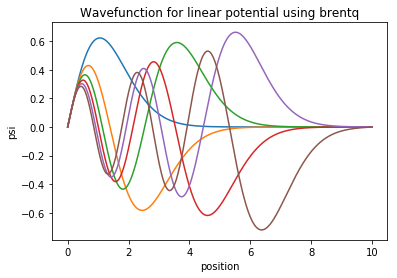

In [11]:
plt.title('Wavefunction for linear potential using brentq')
plt.xlabel('position')
plt.ylabel('psi')
for idx, e in enumerate(Psi_E):
    plt.plot(x, plotPsi(e))

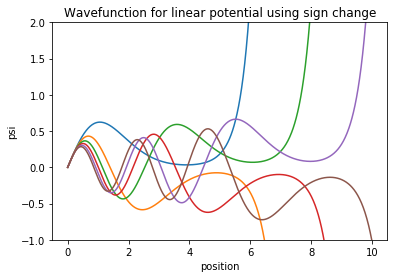

In [12]:
plt.title('Wavefunction for linear potential using sign change')
plt.xlabel('position')
plt.ylabel('psi')
plt.ylim(-1, 2)
for idx, e in enumerate(myRoots):
    plt.plot(x, plotPsi(e))

Brentq clearly did a lot better at finding the root, resulting in much better behaving graphs. The homemade root finder isn't bad though! We are getting the right number of bumps, but the wavefunctions do not go to zero and therefore are not well behaved enough to be real eigenstates. 

We will be using the brentq eigenvalues moving forward since they can actually be normalized.

In [13]:
## Normalize the wavefunction!
## Args: an array containing psi(x)
## Return: an array containing normalized values of psi(x)
## 
## This function takes the integral of psi^2 essentially with a riemann approximation
## psi[i] is then divided by the square root of this integral
## The result is that the integral of psi^2 should be 1 
##   (since the probability of finding the particle in all space should be 1)

def normalize(psi):
    integral = 0
    for i in range(nsteps):
        integral += psi[i]**2*dx
        
    for i in range(nsteps):
        psi[i] /= integral**(1/2)
    return psi

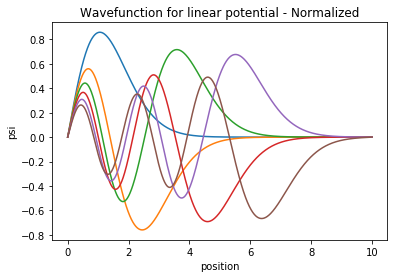

In [14]:
plt.title('Wavefunction for linear potential - Normalized')
plt.xlabel('position')
plt.ylabel('psi')
for idx, e in enumerate(Psi_E):
    plt.plot(x, normalize(plotPsi(e)))

In [15]:
## Args: an array containing psi(x)
## Return: an array containing normalized values of psi^2(x) - the probability function!!
## 
## This function re-normalizes psi(x) - (not very modular/efficient to redo it, I know, but it gets the job done!)
## This time it returns the an array of the square of normalized psi(x)

def probFunc(psi):
    integral = 0
    for i in range(nsteps):
        integral += psi[i]**2*dx
        
    for i in range(nsteps):
        psi[i] = (psi[i] / integral**(1/2))**2
    return psi

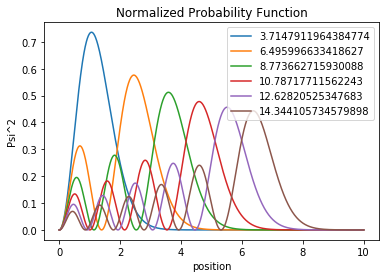

In [16]:
plt.title('Normalized Probability Function')
plt.xlabel('position')
plt.ylabel('Psi^2')
for idx, e in enumerate(Psi_E):
    plt.plot(x, probFunc(plotPsi(e)), label = str(e))
plt.legend()

Lots of interesting information in this graph!! As expected, at higher energies, the particle is able to be further and further from the point of lowest potential energy. The probability of finding the particle also always goes to zero and the position goes to infinity which is good behavior. We don't expect to find the particle too far away from lowest potential energy. There is also the right number of humps for a given energy level that our experience with quantum mechanics would suggest. 

Moveover, the particle is always most likely to be in the hump furthest from zero, which is often unintuitive but actually makes sense. When the particle is at a high energy level but a low poential energy (i.e. near x = 0), it will have a much higher kinetic energy and therefore spend less time near x = 0 and more time further from 0. 